<a href="https://colab.research.google.com/github/AnatoliyZhuk/Project_to_Analyze/blob/main/Projects/Calories_Burned_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Загрузим необходимые для проекта dataset'ы <br/>

In [2]:
exercise = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Project_to_Analyze/main/exercise.csv', sep=',')
calories = pd.read_csv('https://raw.githubusercontent.com/AnatoliyZhuk/Project_to_Analyze/main/calories.csv', sep=',')

Функция **pd.merge()** осуществляет слияние двух DataFrame'ов <br/>
Переименуем одну из колонок для лучшего понимания смысла <br/>
Для описания коэффициента $b_0$ в линейной регрессии нам потребуется дополнительный первый столбец, заполненный единицами в метрице признаков, для этого используем колонку **Intercept** <br/>

In [3]:
data = pd.merge(exercise, calories, how='inner', on='User_ID')
data = data.rename(columns={'Duration' : 'Duration_exircise'})
data['Intercept'] = 1
data.head(3)


,User_ID,Gender,Age,Height,Weight,Duration_exircise,Heart_Rate,Body_Temp,Calories,Intercept
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1


Используем поднастройку **sns.set()** для визуализации в стиле **seaborn**

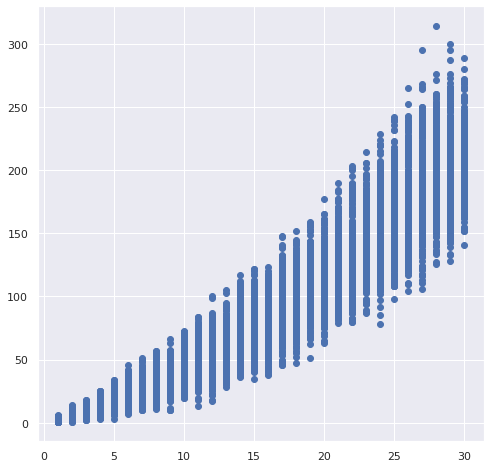

In [4]:
sns.set() 
plt.figure(figsize=(8, 8))
plt.plot(data['Duration_exircise'], data['Calories'], 'bo')
None

In [5]:
X = np.array(data.loc[:, ['Intercept', 'Duration_exircise']])
y = data.loc[:, 'Calories']

Матричная запись для линейной регрессии: $y = Xb + e$ <br/>
Чтобы найти вектор коэффициентов $b$ - нужно умножить обе стороны на транспонированную матрицу $X$: <br/>
$X^\mathrm{T}y = X^\mathrm{T}Xb$ <br/> 
После чего обратить матрицу, получая следующий вид уравнения: <br/>
$b = (X^\mathrm{T}X)^{-1}X^\mathrm{T}y$ 

Не используя библиотеку **Scikit-learn** напишем функцию для линейной регрессии для более глубокого понимания <br/>
Функция **matmul()** вычисляет матричное произведение двух массивов. <br/>
Функция **linalg.inv()** вычисляет обратную матрицу. <br/>
Вычисление обратной матрицы возможно только для квадратных матриц, в случае если матрица не является квадратной, то возникнет ошибка **LinAlgError** <br/>

In [6]:
def lin_reg(X_var, y_var):
  coeff = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_var.T, X_var)), X_var.T), y_var)
  return coeff


In [7]:
coeffs = lin_reg(X, y)
print(f'С помощью линейной регрессии были найдены коэфициенты:\n Смещение составило {coeffs[0]}\n Наклон прямой: {coeffs[1]}')

С помощью линейной регрессии были найдены коэфициенты:
 Смещение составило -21.859656399672385
 Наклон прямой: 7.172883837907462


In [8]:
x_var = np.linspace(4, 35, 1000)
y_var = coeffs[0] + coeffs[1] * x_var

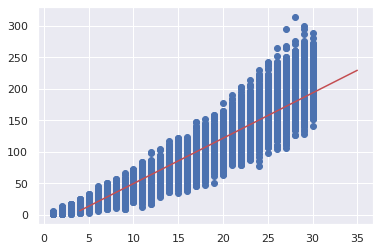

In [9]:
plt.plot(data['Duration_exircise'], data['Calories'], 'bo')
plt.plot(x_var, y_var, 'r')
None

Таким образом, имея прямую, полученную с помощью линейной регрессии, можно оценить сколько калорий будет сожжено в зависимости от длительности физических упражнений

In [10]:
print(f'С помощью 15 минут физических упражнений можно потерять {coeffs[0] + coeffs[1] * 15} калорий')

С помощью 15 минут физических упражнений можно потерять 85.73360116893954 калорий


Попробуем воспользоваться **линейной регрессией** из библиотеки **scikit-learn** и сравнить полученные результаты <br/>
Используем **reshape**, чтобы 'транспонировать' массив (сделать из него столбец) <br/>

In [11]:
Xx = np.array(data['Duration_exircise']).reshape(-1, 1)

Обучение линейной регрессии <br/>

In [12]:
dor = LinearRegression()
dor.fit(Xx,y)
varr = float(dor.coef_)

print(f"Используя линейную регрессию из библиотеки Scikit-learn, были получены:\n Значение смещения {dor.intercept_}\n Значение коэффициента при объясняющей переменной {varr}\n Были получены абсолютно такие же значения коэффициентов регрессии, что и при использовании 'самодельной' функции")

Используя линейную регрессию из библиотеки Scikit-learn, были получены:
 Значение смещения -21.859656399672318
 Значение коэффициента при объясняющей переменной 7.172883837907464
 Были получены абсолютно такие же значения коэффициентов регрессии, что и при использовании 'самодельной' функции
